<img src="./logo.png" style="width:1200px;height:250px"/>

## Ilum Escola de Ciência 
###  Curso: Análise Numérica
### Professor: Vinicius Wasques
### Aluno: Isabela Beneti
### Método de Runge-Kutta

## Importações

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Exercício 1

1) Malthus: $x′=λx$

2) Verhulst: $x′=λx(1−x)$

3) Gompertz: $x′=λxln(1/x)$



##  a)  Para cada modelo esboce o gráfico das soluções analíticas, juntamente com as soluções numéricas. Nesse problema, considere condição inicial  $x(0)=0.5$, espaçamento $h=1$ e constante de crescimento $λ=0.1$.

### 1- Malthus

In [9]:
def runge_kutta_4(f, y0, t0, tf, dt):
    """
    Resolve uma equação diferencial ordinária pelo método de Runge-Kutta de ordem 4.

    Parâmetros:
    f: função que descreve a equação diferencial (deve ter a assinatura f(t, y)).
    y0: valor inicial da solução.
    t0: tempo inicial.
    tf: tempo final.
    dt: tamanho do passo de tempo.

    Retorno:
    Um array com a solução da equação diferencial nos tempos especificados.
    """

    # Inicializa o vetor de tempo e de solução
    t = np.arange(t0, tf + dt, dt)
    y = np.zeros(len(t))
    y[0] = y0

    # Implementa o método de Runge-Kutta de ordem 4
    for i in range(len(t) - 1):
        k1 = dt * f(t[i], y[i])
        k2 = dt * f(t[i] + dt/2, y[i] + k1/2)
        k3 = dt * f(t[i] + dt/2, y[i] + k2/2)
        k4 = dt * f(t[i] + dt, y[i] + k3)
        y[i+1] = y[i] + 1/6 * (k1 + 2*k2 + 2*k3 + k4)

    return y

In [10]:
def metodo_euler(f, y0, h, crit_parada):
    """
    Implementa método de Euler para resolver a equação de Malthus.

    Args:
        f : função que define a equação diferencial.
        x0 : valor inicial da população.
        h : tamanho do passo de integração.
        crit_parada : número de iterações do código.

    Returns:
        listas do eixo x e do eixo y para plotar o gráfico
    """
    y_euler = [y0]  # Lista para armazenar as soluções do eixo y
    x_euler = [0]  # Lista para armazenar valores do eixo x
    y = y0  # Valor inicial

    for i in range(crit_parada):
        y += h * f(x_euler[-1], y)  # Atualiza y usando o método de Euler
        t = (i + 1) * h  # Atualiza t
        x_euler.append(t)
        y_euler.append(y)

    return x_euler, y_euler

In [11]:
# Função que define a equação diferencial de Malthus com taxa de crescimento populacional= 0.1
def equacao_malthus(t,x):
    return 0.1 * x

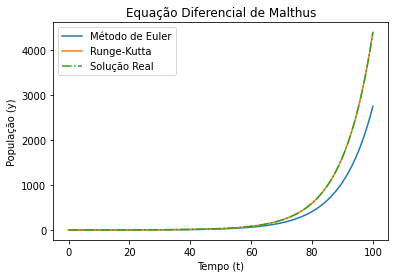

In [12]:
# Parâmetros do problema
x0 = 0.2  # Valor inicial da população
h = 1  # Tamanho do passo
crit_parada = 100  # Número de iterações
lamb = 0.1  # Taxa de crescimento populacional
t0=0 # tempo inicial
tf= 100 # tempo final

# Valores do gráfico do método de Euler
x_malthus_euler, y_malthus_euler = metodo_euler(equacao_malthus, x0, h, crit_parada)

# Valores do gráfico do método de Runge-Kutta
y_malthus_rk= runge_kutta_4(equacao_malthus, x0, t0, tf, h)

# Valores do gráfico real
y_malthus_real = x0 * np.exp(lamb * np.array(x_malthus_euler))


# Plotando o gráfico da solução obtida pelo método de Euler
plt.plot(x_malthus_euler, y_malthus_euler, label='Método de Euler')
# Plotando o gráfico da solução obtida pelo método de Runge-Kutta
plt.plot(x_malthus_euler, y_malthus_rk, label='Runge-Kutta')
# Plotando o gráfico da solução real
plt.plot(x_malthus_euler, y_malthus_real, label='Solução Real', linestyle='dashdot')
plt.xlabel('Tempo (t)')
plt.ylabel('População (y)')
plt.title('Equação Diferencial de Malthus')
plt.legend()
plt.show()

### 2- Verhulst

In [29]:
def verhulst(t,x):
    return 0.1 * x*(1-x)

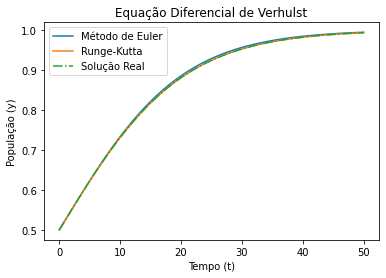

In [30]:
# Valores do gráfico do método de Euler
x_verhulst_euler, y_verhulst_euler = metodo_euler(verhulst, x0, h, 50)

# Valores do gráfico do método de Runge-Kutta
y_verhulst_rk= runge_kutta_4(verhulst, x0, 0, 50, h)

# Valores do gráfico real

y_verhulst_real=  1/(1 + ((1 - x0) / x0) * np.exp(-lamb * np.array(x_verhulst_euler)))

# Plotando o gráfico da solução obtida pelo método de Euler
plt.plot(x_verhulst_euler, y_verhulst_euler, label='Método de Euler')
# Plotando o gráfico da solução obtida pelo método de Runge-Kutta
plt.plot(x_verhulst_euler, y_verhulst_rk, label='Runge-Kutta')
# Plotando o gráfico da solução real
plt.plot(x_verhulst_euler, y_verhulst_real, label='Solução Real', linestyle='dashdot')
plt.xlabel('Tempo (t)')
plt.ylabel('População (y)')
plt.title('Equação Diferencial de Verhulst')
plt.legend()
plt.show()

### 3- Gompertz

In [32]:
def gompertz(t,x):
    return 0.1 * x* np.log(1/x)

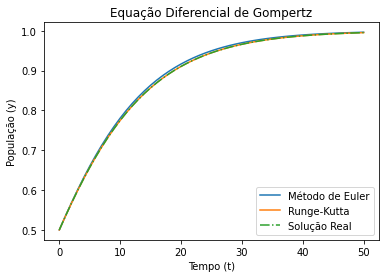

In [33]:
# Valores do gráfico do método de Euler
x_gom_euler, y_gom_euler = metodo_euler(gompertz, x0, h, 50)

# Valores do gráfico do método de Runge-Kutta
y_gom_rk= runge_kutta_4(gompertz, x0, 0, 50, h)

# Valores do gráfico real

y_gom_real=  np.exp(-np.log(2)*np.exp(-lamb* np.array(x_gom_euler)))

# Plotando o gráfico da solução obtida pelo método de Euler
plt.plot(x_gom_euler, y_gom_euler, label='Método de Euler')
# Plotando o gráfico da solução obtida pelo método de Runge-Kutta
plt.plot(x_gom_euler, y_gom_rk, label='Runge-Kutta')
# Plotando o gráfico da solução real
plt.plot(x_gom_euler, y_gom_real, label='Solução Real', linestyle='dashdot')
plt.xlabel('Tempo (t)')
plt.ylabel('População (y)')
plt.title('Equação Diferencial de Gompertz')
plt.legend()
plt.show()

## b) Compare os dois métodos numéricos em relação a solução analítica de cada problema. O que pode ser dito sobre a eficácia das aproximações?

Comparando as soluções dadas por ambos os métodos com a solução analítica, percebe-se que o método de Runge-Kutta gerou resultados mais próximos que o de Euler. Isso fica claro sobretudo na solução da equação de Malthus, em que o Método de Euler gera uma solução muito menos próxima da analítica que o método de Runge-Kutta, como podemos ver no gráfico plotado no item a) e também pelo erro que pode ser calculado por:

In [35]:
erro_malthus_euler = np.linalg.norm(y_malthus_real - y_malthus_euler)
print('Erro do método de Euler em relação à solução analítica da equação de Malthus:', erro_malthus_euler)
erro_malthus_rk = np.linalg.norm(y_malthus_real - y_malthus_rk)
print('Erro do método de Runge Kutta em relação à solução analítica da equação de Malthus:', erro_malthus_rk)

Erro do método de Euler em relação à solução analítica da equação de Malthus: 9341.103346066197
Erro do método de Runge Kutta em relação à solução analítica da equação de Malthus: 0.1896454040750111


Já na solução da equação diferencial de Verhulst, ambos os métodos resultaram em soluções próximas da real, mas, pelo gráfico e pelo erro, podemos concluir que o resultado pelo método de Runge-Kutta foi mais preciso:

In [36]:
error_verhulst_euler = np.linalg.norm(y_verhulst_real - y_verhulst_euler)
print('Erro do método de Euler em relação à solução analítica da equação de Verhulst:', error_verhulst_euler)
error_verhulst_rk = np.linalg.norm(y_verhulst_real - y_verhulst_rk)
print('Erro do método de Runge Kutta em relação à solução analítica da equação de Verhulst:', error_verhulst_rk)

Erro do método de Euler em relação à solução analítica da equação de Verhulst: 0.022010708665428754
Erro do método de Runge Kutta em relação à solução analítica da equação de Verhulst: 2.3532045467513483e-07


Por fim, a solução da equação de Gompertz foi melhor aproximada pelo método de Runge-Kutta, que, assim como na equação de Malthus e de Verhulst, praticamente sobrepôs a solução analítica no gráfico e apresenta um erro muito pequeno:

In [37]:
error_gom_euler = np.linalg.norm(y_gom_real - y_gom_euler)
print('Erro do método de Euler em relação à solução analítica da equação de Gompertz:', error_gom_euler)
error_gom_rk = np.linalg.norm(y_gom_real - y_gom_rk)
print('Erro do método de Runge Kutta em relação à solução analítica da equação de Gompertz:', error_gom_rk)

Erro do método de Euler em relação à solução analítica da equação de Gompertz: 0.029828744723038505
Erro do método de Runge Kutta em relação à solução analítica da equação de Gompertz: 3.9144361883898795e-07


### Observação: como funciona o método `linalg.norm`

O linalg.norm, da biblioteca numpy, calcula a norma da matriz inserida no argumento. No caso, colocamos como argumento uma matriz linha referente à diferença entre os valores de y dados pelo método de Euler ou de Range-Kutta e pelo solução analítica. Como não adicionamos nenhum argumento que especificasse qual tipo de norma queremos, o linalg.norm calcula a norma de Frobenius, que é basicamente a raiz quadrada da soma dos quadrados dos elementos da matriz. Dessa forma, quanto maior o resultado dessa norma, maior a diferença entre o resultado dado pelo método em relação à solução real e, portanto, maior o erro do método usado.